## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [20]:
from sklearn import datasets
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston=datasets.load_boston()

In [5]:
X_train, X_test, y_train, y_test=train_test_split(boston.data, boston.target, random_state=11)

In [27]:
alpha=np.arange(0.085,0.1,0.001)
param={'alpha':alpha}
ridge=Ridge()
clf=GridSearchCV(ridge, param, cv=5)
clf.fit(X_train, y_train)
alpha_best=clf.best_params_
print(alpha_best)

{'alpha': 0.09900000000000002}


In [31]:
ridge=Ridge(alpha=alpha_best['alpha'])
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
y_pred_train=ridge.predict(X_train)
print(ridge.coef_.round(2))

[-1.000e-01  5.000e-02  2.000e-02  2.900e+00 -1.722e+01  4.410e+00
  1.000e-02 -1.370e+00  3.100e-01 -1.000e-02 -8.600e-01  1.000e-02
 -4.900e-01]


RMSE for validation: 5.050677580857206
RMSE for train: 4.5807192342184875
Mean score for cross validation: 0.7023842804362934


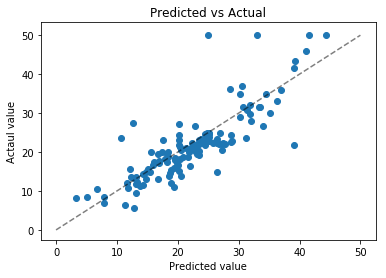

In [25]:
print("RMSE for validation:",mean_squared_error(y_test, y_pred)**0.5)
print("RMSE for train:", mean_squared_error(y_train, y_pred_train)**0.5)
print("Mean score for cross validation:",cross_val_score(ridge, X_train, y_train, cv=5).mean())
plt.plot([0,np.max(y_test)],[0,np.max(y_test)],linestyle='--', color='black', alpha=0.5)
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted value")
plt.ylabel("Actaul value")
plt.title("Predicted vs Actual")
plt.show()